## Abstract:
### Poker Hand classification :
            Problem statement is to predict the poker hand based on the available data. Data consist of information about 5 playing cards from the deck. Each card described using 2 variables: Suit(S) and Rank(C). 

**Attribute Information:**

   1) S1 “Suit of card #1” : (1-4) representing {Hearts, Spades, Diamonds, Clubs}<br>
   2) C1 “Rank of card #1” : (1-13) representing (Ace, 2, 3, ... , Queen, King)<br>
   3) S2 “Suit of card #2” : (1-4) representing {Hearts, Spades, Diamonds, Clubs}<br>
   4) C2 “Rank of card #2” : (1-13) representing (Ace, 2, 3, ... , Queen, King)<br>
   5) S3 “Suit of card #3” : (1-4) representing {Hearts, Spades, Diamonds, Clubs}<br>
   6) C3 “Rank of card #3” : (1-13) representing (Ace, 2, 3, ... , Queen, King)<br>
   7) S4 “Suit of card #4” : (1-4) representing {Hearts, Spades, Diamonds, Clubs}<br>
   8) C4 “Rank of card #4” : (1-13) representing (Ace, 2, 3, ... , Queen, King)<br>
   9) S5 “Suit of card #5” : (1-4) representing {Hearts, Spades, Diamonds, Clubs}<br>
   10) C5 “Rank of card #5” : (1-13) representing (Ace, 2, 3, ... , Queen, King)<br>
   11) CLASS “Poker Hand”  : (0-9) Representing..<br>
      
      0: Nothing in hand; not a recognized poker hand
      1: One pair; one pair of equal ranks within five cards
      2: Two pairs; two pairs of equal ranks within five cards
      3: Three of a kind; three equal ranks within five cards
      4: Straight; five cards, sequentially ranked with no gaps
      5: Flush; five cards with the same suit
      6: Full house; pair + different rank three of a kind
      7: Four of a kind; four equal ranks within five cards
      8: Straight flush; straight + flush
      9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush


## Libraries:

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from pycm import *

In [63]:
df = pd.read_csv("poker-hand-testing.DATA")
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [64]:
corr=df.corr()
corr

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
S1,1.000000,-0.001450,-0.021647,0.001212,-0.019335,0.000414,-0.019263,-0.000059,-0.018926,0.001545,0.000031
C1,-0.001450,1.000000,-0.000679,-0.021512,-0.000133,-0.019390,-0.000118,-0.018657,0.000212,-0.021046,0.003877
S2,-0.021647,-0.000679,1.000000,0.000061,-0.019172,0.000963,-0.020511,-0.000118,-0.020205,0.001309,-0.000195
C2,0.001212,-0.021512,0.000061,1.000000,-0.000438,-0.020856,0.001535,-0.020684,-0.000639,-0.017275,0.001711
S3,-0.019335,-0.000133,-0.019172,-0.000438,1.000000,0.001093,-0.019825,0.000623,-0.020612,0.000017,0.001194
C3,0.000414,-0.019390,0.000963,-0.020856,0.001093,1.000000,-0.000176,-0.019029,0.001361,-0.020381,0.002483
S4,-0.019263,-0.000118,-0.020511,0.001535,-0.019825,-0.000176,1.000000,-0.000339,-0.019475,-0.000368,-0.001157
C4,-0.000059,-0.018657,-0.000118,-0.020684,0.000623,-0.019029,-0.000339,1.000000,0.000862,-0.020783,0.003011
S5,-0.018926,0.000212,-0.020205,-0.000639,-0.020612,0.001361,-0.019475,0.000862,1.000000,-0.000088,-0.001514
C5,0.001545,-0.021046,0.001309,-0.017275,0.000017,-0.020381,-0.000368,-0.020783,-0.000088,1.000000,0.001603


All independent variables are significant and have impact on dependent variable.

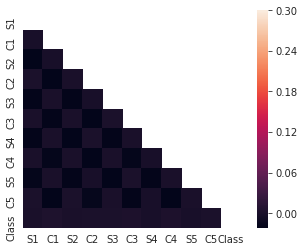

In [65]:
corr=df.corr()
#mask = np.zeros_like(corr)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

## Dependent, Independent variable declearation :

In [66]:
y=df['Class']
X=df.drop(['Class'],axis=1)
features=np.array(X)
feature_list=X.columns
models=[]
scores=[]

# Train,Test,Val Split: 
__Spliting into traing,Validation and testing data:__

In [67]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.1,random_state=2)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, random_state=1)
print("\ntrain_X",train_X.shape,"\ntest_X",test_X.shape, "\nval_X",val_X.shape, "\ntrain_y",train_y.shape,"\ntest_y",test_y.shape,"\nval_y", val_y.shape)


train_X (720000, 10) 
test_X (100000, 10) 
val_X (180000, 10) 
train_y (720000,) 
test_y (100000,) 
val_y (180000,)


## Stats of the variables: 

In [68]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(train_X)
est = sm.OLS(train_y, X2)
est2 = est.fit()
print(est2.summary())

C:\Users\khist\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.349
Date:                Mon, 27 Jan 2020   Prob (F-statistic):            0.00908
Time:                        21:07:10   Log-Likelihood:            -8.3750e+05
No. Observations:              720000   AIC:                         1.675e+06
Df Residuals:                  719989   BIC:                         1.675e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6020      0.006     96.167      0.0

__Used OLS to get important features from the dataset.__

__Here we can see, p-value for const, c1,c2,c4 are Important as it's p-value is less that 0.05__ <br>
*Note: P-value and T are inversely proportional.* 

# Metrics

In [69]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss,f1_score, average_precision_score
from sklearn.model_selection import cross_val_score

# 1.Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [71]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(train_X, train_y)

C:\Users\khist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:
pred_rf= rfc.predict(val_X)

In [73]:
score_rf=f1_score(val_y,pred_rf,average="micro")
score_rf

0.5021

In [74]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
print("Important of independant variables:  ")
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Important of independant variables:  
Variable: C2                   Importance: 0.38
Variable: C4                   Importance: 0.1
Variable: S5                   Importance: 0.1
Variable: S2                   Importance: 0.09
Variable: S3                   Importance: 0.09
Variable: C5                   Importance: 0.09
Variable: C1                   Importance: 0.08
Variable: C3                   Importance: 0.05
Variable: S1                   Importance: 0.02
Variable: S4                   Importance: 0.01


In [75]:
## Statistics 
y_actu =  numpy.array(val_y) 
y_pred =  numpy.array(pred_rf) 

cm1 = ConfusionMatrix(actual_vector=y_actu, predict_vector=y_pred) # Create CM From Data
print("Total Classes: ",cm1.classes)
print(cm1.stat(summary=True))

Total Classes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Overall Statistics : 

ACC Macro                                                         0.90042
F1 Macro                                                          0.06824
Kappa                                                             0.00694
Overall ACC                                                       0.5021
PPV Macro                                                         None
SOA1(Landis & Koch)                                               Slight
TPR Macro                                                         0.10074
Zero-one Loss                                                     89622

Class Statistics :

Classes                                                           0             1             2             3             4             5             6             7             8             9             
ACC(Accuracy)                                                     0.50327       0.57702       0.95247       0.97869  

C:\Users\khist\Anaconda3\lib\site-packages\pycm\pycm_obj.py:174: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
The save_csv method can be used to save the confusion matrix in csv format and have a better demonstration of it.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


1. **Is the relationship significant?**
-> Yes
2. **Are any model assumptions violated?**
-> No
3. **Is there any multi-collinearity in the model?**
-> No
4. **In the multivariate models are predictor variables independent of all the other predictor variables?**
-> Yes,there is No multi-collinearity**
5. **In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
-> C2,C5,S2,C3 are the most important features amongs the other**
6. **Does the model make sense?**
-> yes**
7. **Does regularization help?**
-> did not use any regularization method **
8. **Which independent variables are significant?**
->C2,C5,S2,C3 are significant**
9. **Which hyperparameters are important?**
-> **max_depth is important hyperparamenter in this model** 

# 2.KNeighborsClassifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [78]:
pred_knn=neigh.predict(val_X)

In [79]:
score_knn=accuracy_score(val_y, pred_knn)
score_knn

0.6362

In [80]:
y_actu =  numpy.array(val_y) 
y_pred =  numpy.array(pred_knn) 

cm2 = ConfusionMatrix(actual_vector=y_actu, predict_vector=y_pred) # Create CM From Data
print("Total Classes: ",cm2.classes)
print(cm2.stat(summary=True))

Total Classes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Overall Statistics : 

ACC Macro                                                         0.92724
F1 Macro                                                          0.1322
Kappa                                                             0.31329
Overall ACC                                                       0.6362
PPV Macro                                                         None
SOA1(Landis & Koch)                                               Fair
TPR Macro                                                         0.13669
Zero-one Loss                                                     65484

Class Statistics :

Classes                                                           0             1             2             3             4             5             6             7             8             9             
ACC(Accuracy)                                                     0.69767       0.65088       0.95239       0.97871     

C:\Users\khist\Anaconda3\lib\site-packages\pycm\pycm_obj.py:174: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
The save_csv method can be used to save the confusion matrix in csv format and have a better demonstration of it.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


1. **Is the relationship significant?**
-> **Yes**
2. **Are any model assumptions violated?**
-> **No**
3. **Is there any multi-collinearity in the model?**
-> **No**
4. **In the multivariate models are predictor variables independent of all the other predictor variables?**
-> **Yes,there is No multi-collinearity**
6. **Does the model make sense?**
-> **yes**
7. **Does regularization help?**
-> **did not use any regularization method**
8. **Which independent variables are significant?**
-> **C2,C5,S2,C3 are significant**
9. **Which hyperparameters are important?**
-> **n_neighbors is important hyperparamenter in this model**

# 3.GradientBoostingClassifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(train_X, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [82]:
pred_gbc=gbc.predict(val_X)

In [83]:
print("Important of independant variables:  ")
importances = list(gbc.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Important of independant variables:  
Variable: C1                   Importance: 0.23
Variable: C5                   Importance: 0.22
Variable: C2                   Importance: 0.2
Variable: C4                   Importance: 0.19
Variable: C3                   Importance: 0.14
Variable: S1                   Importance: 0.0
Variable: S2                   Importance: 0.0
Variable: S3                   Importance: 0.0
Variable: S4                   Importance: 0.0
Variable: S5                   Importance: 0.0


In [84]:
score_gbc=gbc.score(val_X, val_y)
score_gbc

0.6335333333333333

In [85]:
y_actu =  numpy.array(val_y) 
y_pred =  numpy.array(pred_gbc) 

cm3 = ConfusionMatrix(actual_vector=y_actu, predict_vector=y_pred) # Create CM From Data
print("Total Classes: ",cm3.classes)
print(cm3.stat(summary=True))

Total Classes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Overall Statistics : 

ACC Macro                                                         0.92671
F1 Macro                                                          0.17324
Kappa                                                             0.30251
Overall ACC                                                       0.63353
PPV Macro                                                         None
SOA1(Landis & Koch)                                               Fair
TPR Macro                                                         0.16143
Zero-one Loss                                                     65964

Class Statistics :

Classes                                                           0             1             2             3             4             5             6             7             8             9             
ACC(Accuracy)                                                     0.68981       0.65216       0.95247       0.97942   

C:\Users\khist\Anaconda3\lib\site-packages\pycm\pycm_obj.py:174: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
The save_csv method can be used to save the confusion matrix in csv format and have a better demonstration of it.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


1. **Is the relationship significant?**
-> **Yes**
2. **Are any model assumptions violated?**
-> **No**
3. **Is there any multi-collinearity in the model?**
-> **No**
4. **In the multivariate models are predictor variables independent of all the other predictor variables?**
-> **Yes,there is No multi-collinearity**
5. **In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
-> **C3,C4,C5,C1,C2,S4,S5 are the most important features amongs the other**
6. **Does the model make sense?**
-> **yes**
7. **Does regularization help?**
-> **did not use any regularization method**
8. **Which independent variables are significant?**
-> **C3,C4,C5,C1,C2,S4,S5 are significant**
9. **Which hyperparameters are important?**
-> **max_depth and learning rate is important hyperparamenter in this model** 

# Validation on Test data:

In [94]:
label = ['RF','KNN','GBC']
s1=[]

In [95]:
## Random Forest
pred_rfc_t=rfc.predict(test_X)
s1.append(f1_score(test_y,pred_rfc_t,average="micro"))
print("Random Forest :",f1_score(test_y,pred_rfc_t,average="micro"))

Random Forest : 0.50637


In [96]:
#KNeighborsClassifier
pred_knn_t=neigh.predict(test_X)
score_knn_t=accuracy_score(test_y, pred_knn_t)
s1.append(score_knn_t)
print("KNN :",score_knn_t)

KNN : 0.63948


In [97]:
##GradientBoostingClassifier
pred_gbc_t=gbc.predict(test_X)
score_gbc_t=gbc.score(test_X, test_y)
s1.append(score_gbc_t)
print("GradientBoostingClassifier :",score_gbc_t)

GradientBoostingClassifier : 0.63515


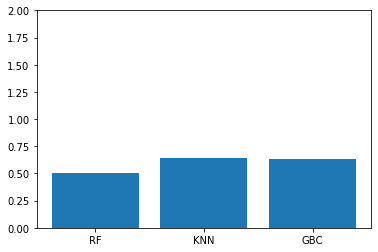

In [98]:
import math
import matplotlib.pyplot as plt

x = label
y = s1
low = 0.0
high = 0.80
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
plt.bar(x,y) 
plt.show()

# Conclusion
<br>
From "Random Forest, KNeighborsClassifier and GradientBoostingClassifier", KNeighborsClassifier gave higher accuracy for this dataset which is 63.94%. <br> 
Althogh, OLS is used for Regression, I used it to get the statistics about the independent varibles such as T-test,        P-value etc.<br>
I have Used corr() to find out multi-collinearity between the independent variables but it is advisable to use VIF for that purpose. <br>
Also, The accuracy can be improved by building Bay's model.<br> 
Hyper parameter tuning is necessary to get more accuarcy since the data is discrete and random.<br> 
            
             

# Author:
Pranav Khiste( NUID : 001057866 )<br>
Information Systems<br>
Northeastern University<br>

# Citation:
References:<br>
https://archive.ics.uci.edu/ml/datasets/Poker+Hand<br>
https://scikit-learn.org/stable/index.html<br>
https://towardsdatascience.com/<br>

# Licensing

Copyright 2020 Pranav Sanjay Khiste

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.